In [1]:
include("../functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


## **Ferrofluid Jet**

Solving for travelling waves on the surface of a jet of magnetized fluid. (include equations)

### **Dispersion relation**

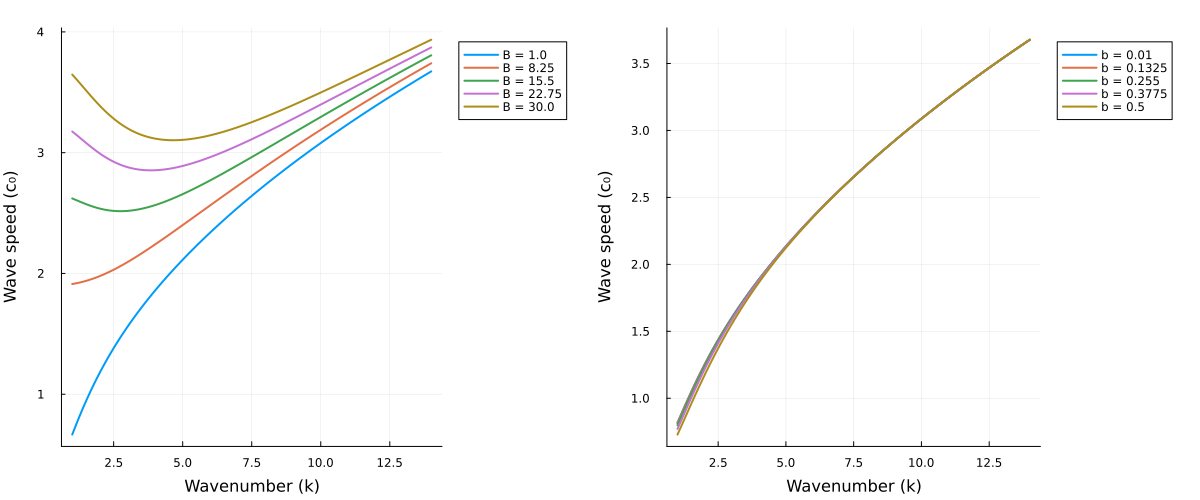

In [2]:
b = 0.1
B_range = range(1, 30, length=5)
L = π
N = 36

k_range = range(1, 14, length=100)
c0_vs_k = zeros(length(B_range), length(k_range))

for (n, B_val) in enumerate(B_range)

    constants = ferrofluidConstants(N, L, B_val, b)
    c0_vs_k[n,:] = c0(k_range, constants)

end

p1 = plot(legend=:outertopright)
for (n, b) in enumerate(B_range)
    plot!(k_range, c0_vs_k[n,:], 
        xlabel="Wavenumber (k)", 
        ylabel="Wave speed (c₀)", 
        label="B = $(b)", lw=2)
end

N = 36; L = π; B = 1.5; B = 1.5; b = 0.1
constants = ferrofluidConstants(N, L, B, b)

k_range = range(1, 14, length=100)

p2 = plot_dispersion(k_range, constants, vary_param = :b, param_range = range(0.01, 0.5, length=5))

## display plots side by side
plot(p1, p2, layout=(1,2), size=(1200,500), margin=20px)

### **Computing solutions**

In [3]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.01, 0.33, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1
B = 1.5

# Create an instance of the Constants struct
constants = ferrofluidConstants(N, L, B, b)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-16, solver = :NLSolver, max_iter = 10000, overwrite = true);

Branch point 10 of 100, 3 iterations.
Branch point 20 of 100, 3 iterations.
Branch point 30 of 100, 3 iterations.
Branch point 40 of 100, 3 iterations.
Branch point 50 of 100, 3 iterations.
Branch point 60 of 100, 4 iterations.
Branch point 70 of 100, 4 iterations.
Branch point 80 of 100, 4 iterations.
Branch point 90 of 100, 6 iterations.
Branch point 100 of 100, 52 iterations.
Saved solution branch to ferrofluid_19-03_19-51-22_2025.jld2
 14.663383 seconds (330.25 M allocations: 12.582 GiB, 7.19% gc time, 110.97% compilation time: <1% of which was recompilation)


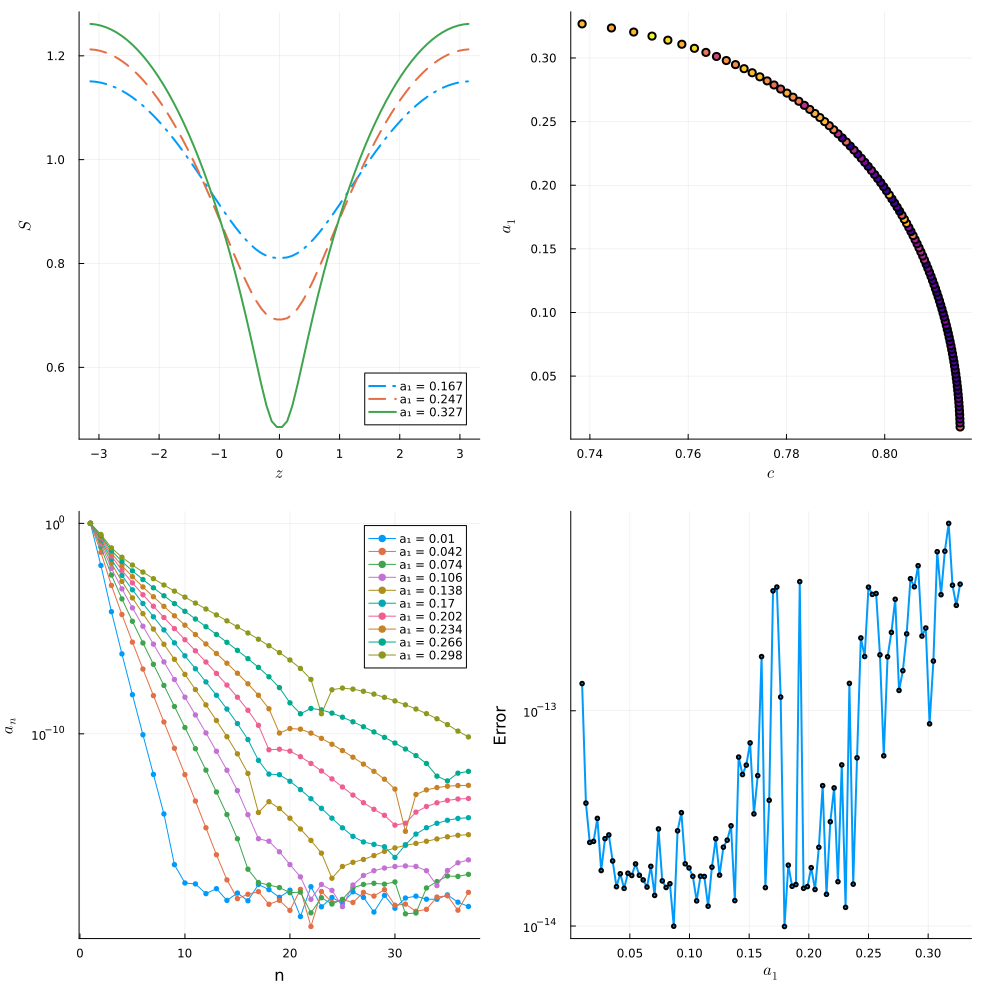

In [4]:
plotEverything(solutions, constants, metadata)

# An error to look at

There's an inexact error that occurs sometimes when we increase the number of modes:

`InexactError: Float64(-0.0973221453469082 - 3.141592653589793im)`

Observe that the error occurs with an imaginary part that is essentially π.

In [3]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.01, 0.33, branchN + 1))

# Define the values for the parameters
N = 46
L = π
b = 0.1
B = 1.5

# Create an instance of the Constants struct
constants = ferrofluidConstants(N, L, B, b)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-15, solver = :NLSolver, max_iter = 10000, overwrite = true);

Branch point 10 of 100, 3 iterations.
Branch point 20 of 100, 3 iterations.
Branch point 30 of 100, 3 iterations.
Branch point 40 of 100, 3 iterations.
Branch point 50 of 100, 4 iterations.
Branch point 60 of 100, 5 iterations.
Branch point 70 of 100, 5 iterations.
Branch point 80 of 100, 109 iterations.


CompositeException: TaskFailedException

    nested task error: InexactError: Float64(-0.0973221453469082 - 3.141592653589793im)
    Stacktrace:
      [1] Real
        @ ./complex.jl:44 [inlined]
      [2] convert
        @ ./number.jl:7 [inlined]
      [3] setindex!
        @ ./array.jl:987 [inlined]
      [4] macro expansion
        @ ./broadcast.jl:973 [inlined]
      [5] macro expansion
        @ ./simdloop.jl:77 [inlined]
      [6] copyto!
        @ ./broadcast.jl:972 [inlined]
      [7] copyto!
        @ ./broadcast.jl:925 [inlined]
      [8] materialize!
        @ ./broadcast.jl:883 [inlined]
      [9] materialize!
        @ ./broadcast.jl:880 [inlined]
     [10] β_scaled(k::Float64, S::Vector{Float64}, b::Float64)
        @ Main ~/Documents/kylindros/core/equations.jl:79
     [11] macro expansion
        @ ~/Documents/kylindros/core/equations.jl:44 [inlined]
     [12] (::var"#79#threadsfor_fun#20"{var"#79#threadsfor_fun#19#21"{Vector{Float64}, Matrix{Float64}, Vector{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ Main ./threadingconstructs.jl:253
     [13] #79#threadsfor_fun
        @ ./threadingconstructs.jl:220 [inlined]
     [14] (::Base.Threads.var"#1#2"{var"#79#threadsfor_fun#20"{var"#79#threadsfor_fun#19#21"{Vector{Float64}, Matrix{Float64}, Vector{Float64}, UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

...and 31 more exceptions.


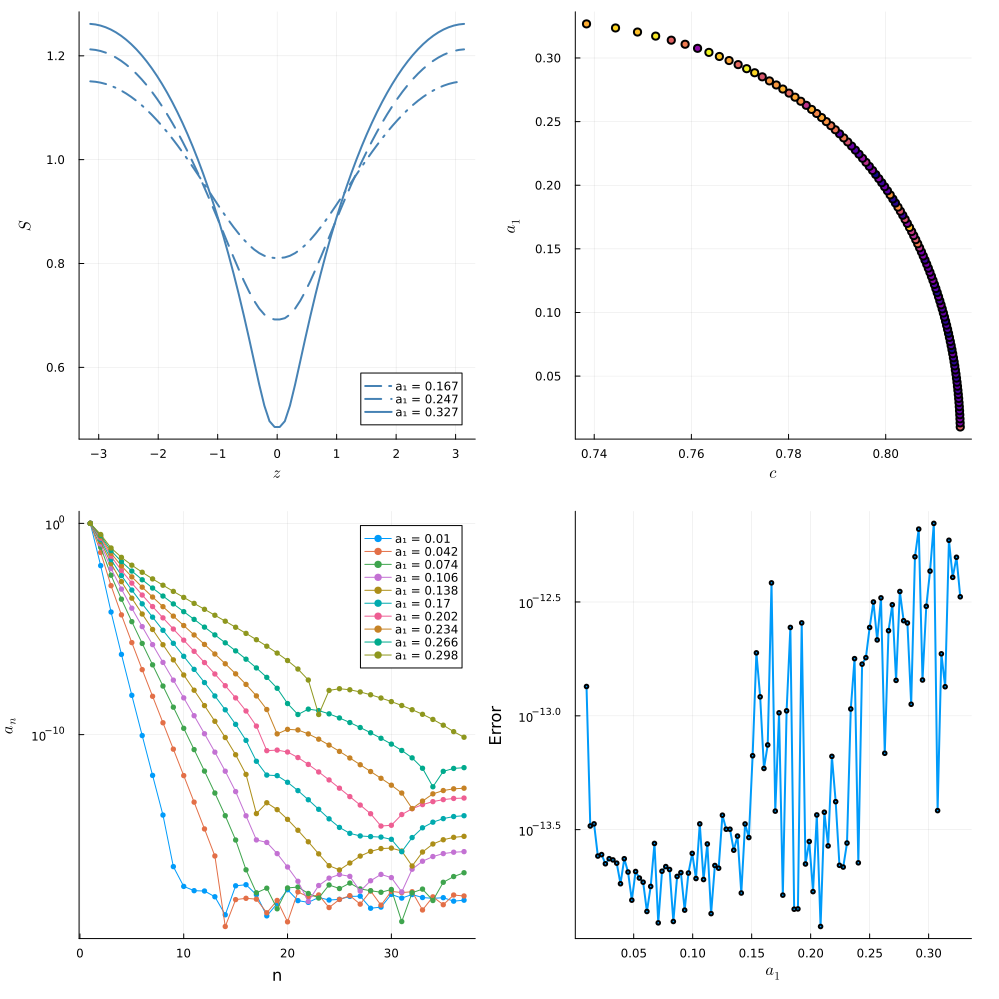

In [3]:
plotEverything(solutions, constants, metadata)

In [3]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.01, 0.33, branchN + 1))

# Define the values for the parameters
N = 37
L = π
b = 0.1
B = 1.5

# Create an instance of the Constants struct
constants = ferrofluidConstants(N, L, B, b)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-16, solver = :NLSolver, max_iter = 10000, overwrite = true);

Solution branch already exists, but overwrite flag is set.
Deleting existing file: /home/karnav/Documents/kylindros/results/ferrofluid/ferrofluid_18-10_22-11-15_2025_N37.jld2
Branch point 10 of 100, 3 iterations.
Branch point 20 of 100, 3 iterations.
Branch point 30 of 100, 3 iterations.
Branch point 40 of 100, 3 iterations.
Branch point 50 of 100, 4 iterations.
Branch point 60 of 100, 3 iterations.
Branch point 70 of 100, 4 iterations.
Branch point 80 of 100, 4 iterations.
Branch point 90 of 100, 12 iterations.
Branch point 100 of 100, 92 iterations.
Saved solution branch to ferrofluid_18-10_22-11-54_2025_N37.jld2
 31.583263 seconds (492.69 M allocations: 21.417 GiB, 3.96% gc time)
